<a href="https://colab.research.google.com/github/abeni-hub/Machine_Learning-Project-Collections/blob/main/Fruits_and_vegetable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [14]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/train',
    labels='inferred',
    label_mode = "categorical",
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1063 files belonging to 36 classes.


# Validation Testing

In [15]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/validation',
    labels='inferred',
    label_mode = "categorical",
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


## Building MODEL

In [16]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size = 3 , activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size = 3 , activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.5)) #Used to avoid overfitting

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units =128 ,activation='relu')) # To make a neurons
cnn.add(tf.keras.layers.Dense(units = 36 ,activation='softmax')) # To make output layers of the neuron

#Compiling and Training Phase

In [21]:
cnn.compile(optimizer = 'rmsprop',loss ='categorical_crossentropy' , metrics=['accuracy'])

In [22]:
training_history = cnn.fit(x = training_set , validation_data = validation_set , epochs = 30)

Epoch 1/30
34/34 [==============================] - 43s 1s/step - loss: 14.4744 - accuracy: 0.1430 - val_loss: 9.7541 - val_accuracy: 0.0684
Epoch 2/30
34/34 [==============================] - 41s 1s/step - loss: 5.4405 - accuracy: 0.1486 - val_loss: 5.3694 - val_accuracy: 0.1453
Epoch 3/30
34/34 [==============================] - 38s 1s/step - loss: 3.0004 - accuracy: 0.2549 - val_loss: 32.7854 - val_accuracy: 0.0655
Epoch 4/30
34/34 [==============================] - 39s 1s/step - loss: 3.4561 - accuracy: 0.3302 - val_loss: 11.9965 - val_accuracy: 0.2536
Epoch 5/30
34/34 [==============================] - 42s 1s/step - loss: 2.6010 - accuracy: 0.4036 - val_loss: 31.3506 - val_accuracy: 0.1197
Epoch 6/30
34/34 [==============================] - 42s 1s/step - loss: 2.8359 - accuracy: 0.4478 - val_loss: 27.3754 - val_accuracy: 0.1880
Epoch 7/30
34/34 [==============================] - 41s 1s/step - loss: 1.7223 - accuracy: 0.5663 - val_loss: 29.6916 - val_accuracy: 0.2764
Epoch 8/30
34/

#Saving Model

In [24]:
cnn.save('trained_model.h5')

In [25]:
training_history.history

{'loss': [14.474396705627441,
  5.440454006195068,
  3.000399112701416,
  3.4561190605163574,
  2.6009762287139893,
  2.8359012603759766,
  1.7222645282745361,
  3.525297164916992,
  2.506056547164917,
  0.8410431742668152,
  1.936687707901001,
  1.0925288200378418,
  1.5180037021636963,
  1.1569912433624268,
  2.183760166168213,
  0.8698760271072388,
  0.42228975892066956,
  0.8322134017944336,
  0.7304633259773254,
  1.2717609405517578,
  0.5267865657806396,
  0.8106227517127991,
  0.6448823809623718,
  0.7533586025238037,
  1.0373773574829102,
  0.36099985241889954,
  0.5629060864448547,
  0.6703989505767822,
  1.9287446737289429,
  0.6426323652267456],
 'accuracy': [0.14299152791500092,
  0.14863593876361847,
  0.25493884086608887,
  0.3301975429058075,
  0.40357479453086853,
  0.4477892816066742,
  0.5663217306137085,
  0.603951096534729,
  0.6415804624557495,
  0.7826905250549316,
  0.6773282885551453,
  0.793038547039032,
  0.7883349061012268,
  0.793979287147522,
  0.8193790912

In [28]:
# Recording History in json
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history ,f)

In [29]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model Achieved on Validation Set

In [33]:
print("validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set Accuracy: 32.76353180408478 %


In [40]:
training_history.history['accuracy']

[0.14299152791500092,
 0.14863593876361847,
 0.25493884086608887,
 0.3301975429058075,
 0.40357479453086853,
 0.4477892816066742,
 0.5663217306137085,
 0.603951096534729,
 0.6415804624557495,
 0.7826905250549316,
 0.6773282885551453,
 0.793038547039032,
 0.7883349061012268,
 0.793979287147522,
 0.8193790912628174,
 0.870178759098053,
 0.8889934420585632,
 0.865475058555603,
 0.8824082612991333,
 0.8494825959205627,
 0.928504228591919,
 0.8936970829963684,
 0.9049859046936035,
 0.9162746667861938,
 0.9087488055229187,
 0.9510818719863892,
 0.926622748374939,
 0.9172154068946838,
 0.9040451645851135,
 0.926622748374939]

# Accuracy Visualization

Training Visualization

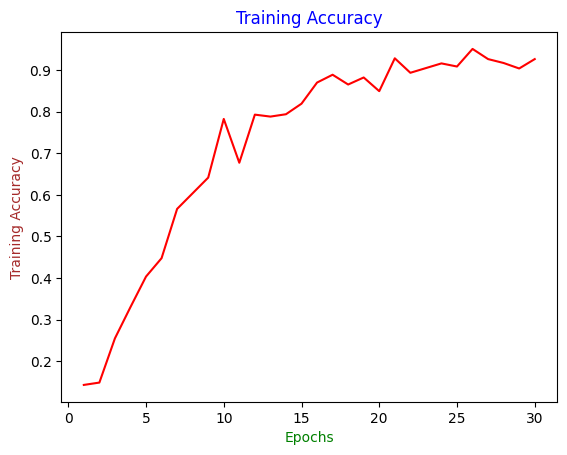

In [44]:
epochs = [i for i in range(1,31)]
plt.plot(epochs , training_history.history['accuracy'] , color= 'red')
plt.xlabel('Epochs'  , color = "Green")
plt.ylabel('Training Accuracy' , color = "Brown")
plt.title('Training Accuracy' , color = "Blue")
plt.show()

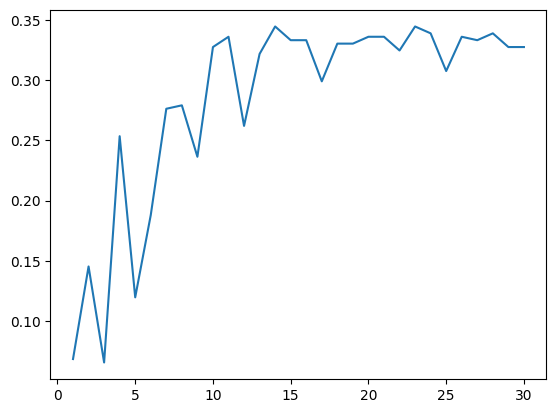

In [39]:

plt.plot(epochs , training_history.history['val_accuracy'])

Importing Libraries